<a href="https://colab.research.google.com/github/camilorey/material_clases/blob/main/nuestro_primer_clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install gekko
import gekko
import numpy as np #librería básica para cálculo numérico
import pandas as pd #administrar datos en formato DataFrame
#librerías para graficar datos 
import matplotlib.pyplot as plt #para administrar gráficos
import seaborn as sns #para generar graficos en específico

# Generador de muestras de 2 poblaciones normales

En esta sección vamos a crear un pequeño datset dos dimensional. La primera variable:

* $X\in\mathbb{R}$ va a ser un número aleatorio normalmente distribuido con media $\mu$ y desviación $\sigma$

* un entero $n\in\{0,1\}$ que nos indicará la **clase** del número, donde su media y su varianza dependen de la clase a la que pertenece. 

In [32]:
#una muestra de N números aleatorios con media mu y desviación sigma. 
def crear_muestra_clase(mu,sigma,N):
  return np.random.normal(mu,sigma,N)

#crear una población de números de clases 0 y clase 1. 
def crear_poblacion(mu_1,mu_2,sigma_1,sigma_2,N_1,N_2):
  #vamos a generar N_1 números para la clase 0 con media mu_1 y desviación sigma_1
  clase_0  = crear_muestra_clase(mu_1,sigma_1,N_1)
  print(len(clase_0))
  #vamos a generar N_2 números para la clase 1 con media mu_2 y desviación sigma_2
  clase_1  = crear_muestra_clase(mu_2,sigma_2,N_2)
  print(len(clase_1))
  #creamos un DataFrame para contener una población. 
  resultado = pd.DataFrame(columns=['X','clase'])
  #vamos a meter todos los números en la lista clase_0 al DataFrame con un 0 en 
  #su clase. 
  for num_0 in clase_0:
    resultado = resultado.append({'clase':0,'X':num_0},ignore_index=True)
  #ahora ponemos los clase 1. 
  for num_1 in clase_1:
    resultado = resultado.append({'X':num_1,'clase':1},ignore_index=True)
  #barajemos las líneas del DAtaFrame para que nos queden 0s y 1s revueltos.
  #vamos a tomar el 100% del DataFrame (aleatoriamente seleccionado) 
  return resultado.sample(frac=1).reset_index(drop=True)

In [33]:
crear_poblacion(0.1,0.2,0.5,.8,5,5)

5
5


,X,clase
0,0.084210,0.0
1,-0.118371,0.0
2,-1.195089,1.0
3,-0.308283,1.0
4,0.050994,0.0
5,1.245929,1.0
6,0.209833,1.0
7,-0.023708,1.0
8,0.774191,0.0
9,0.214277,0.0


vamos a generar una población completa con 1000 muestras de cada clase. El tamaño total de nuestra población será de 2000 miembros. Para este ejemplo, vamos a generar nuestra población clase $0$ distribuida como 

$X_0 \sim N(0.1,0.18)$ 

mientras que nuestra población clase $1$ estará distribuida 

$X_1 \sim N(0.55,0.15)$ 

Estos valores serán importantes para nuestro problema de clasificación binario más adelante. 

In [8]:
poblacion = crear_poblacion(0.1,0.55,0.18,0.15,1000,1000)
poblacion

,X,clase
0,0.050351,0.0
1,0.621178,1.0
2,-0.096814,0.0
3,0.577475,1.0
4,0.620700,1.0
...,...,...
1995,0.561256,1.0
1996,0.459535,1.0
1997,0.251958,0.0
1998,0.090805,0.0


In [18]:
poblacion.sample(5)

,X,clase,doble-X
1131,0.528493,0.0,1.056986
866,0.255068,0.0,0.510137
1410,0.398625,1.0,0.797250
1237,-0.124802,0.0,-0.249604
1887,0.006284,0.0,0.012567


Algunos cálculos sobre un DataFrame. 

In [11]:
print("máximo de los X", poblacion['X'].max())
print("promedio de las clases ", poblacion['clase'].mean())

máximo de los X 1.0943357402394955
promedio de las clases  0.5


Algo de información sobre el dataframe. Los tipos de las columnas. 

In [12]:
poblacion.dtypes

X        float64
clase    float64
dtype: object

Vamos a corregir el tipo de la columna clase. Lo queremos pasar de float64 a int (Entero). Vamos a usar una función: **round()** de redondeo. 

In [14]:
poblacion['clase'] = round(poblacion['clase'])

Vamos a agregar una nueva columna a este *DataFrame* con el valor de $2X$. 

In [16]:
poblacion['doble-X'] = poblacion['X']*2

In [17]:
poblacion

,X,clase,doble-X
0,0.050351,0.0,0.100702
1,0.621178,1.0,1.242356
2,-0.096814,0.0,-0.193628
3,0.577475,1.0,1.154951
4,0.620700,1.0,1.241400
...,...,...,...
1995,0.561256,1.0,1.122512
1996,0.459535,1.0,0.919071
1997,0.251958,0.0,0.503916
1998,0.090805,0.0,0.181610


# Gráficas exploratorias típicas para una variable.

En esta sección vamos a ver unas gráficas típicas cuando estamos mirando una sola variable probabilística usando la librería SeaBorn y PyPlot. Solamente necesitamos ver dos cosas:

* El histograma de los datos
* La gráfica de barras para ver cómo se distribuyen las clases dentro del dataset
* La gráfica de bigotes para ver cómo se comportan como variables aleatorias. 



Comenzamos con el histograma general de la variable $X$ para todos los datos (Sin observar la clase). 

In [34]:
print("mínimo", poblacion['X'].min())
print("máximo",poblacion['X'].max())

mínimo -0.47985774874060305
máximo 1.0943357402394955


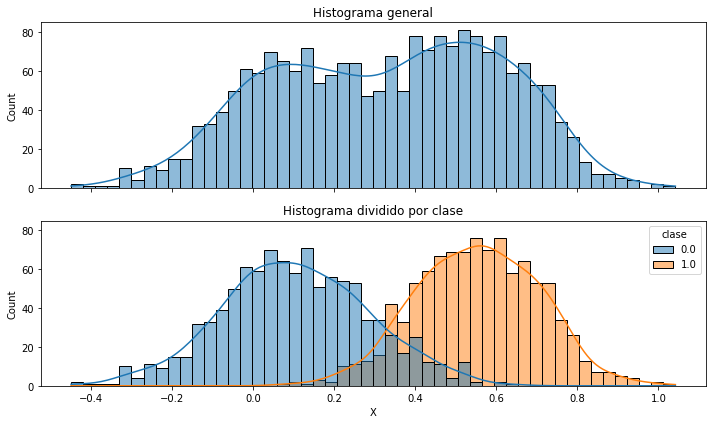

In [29]:
#instrucción de PyPlot: quiero dos gráficas (un arreglo 2x1 de ellas), 
#que comparan eje x y eje y, una sobre la otra. 
fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True,sharey=True) #para cuadrarle el tamaño a la gráfica
ax[0].set_title('Histograma general')
ax[1].set_title('Histograma dividido por clase')
#usamos la librería de SeaBorn que genere el histograma de la variable X 
#y póngala en los ejes ax[0] (la primera figura)
sns.histplot(poblacion,x='X',bins=50,kde=True,ax=ax[0])
#usemos SeaBorn para generar un histograma de la variable X, pero coloreee los
#histogramas dependiendo de la clase (hue='clase') y póngalo en los ejes 1 (ax[1])
sns.histplot(poblacion,x='X',hue='clase',bins=50,kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

# Un primer clasificador para distinguir clases dentro de una población. 

Sabemos a priori que cada una de las clases está distribuida normalmente con media $\mu_c$ y desviación $\sigma_c$. Una primera forma de distinguirlos entonces sería con una *prueba de normalidad*. 

En una situación real, no sabríamos ni $\mu$ ni $\sigma$, razón por la cual debemos estimarla de dentro de la población. Los estimadores tanto de $\mu$ como de $\sigma$ son los clásicos estimadores en estadística 

>>$\mu \sim \bar{X} = \frac{1}{k}\sum_{i=1}^k x_i$

>>$\sigma^2 \sim S^2(X) = \frac{1}{k-1}\sum_{i=1}^k (x_i-\bar{x})^2$

donde $k$ es el tamaño de una muestra. Así, podemos *estimar* los valores de la media y la desviación de cada clase por medio de **muestreo** de la población. A priori sabemos cuanto valen (pues generamos los valores usando un procedimiento). 

Vamos a generar un procedimiento que dada una muestra de una clase específica nos diga cuales son sus estimadores de media y desviación. 

In [35]:
def parametros_muestra(k,clase):
  #filtramos por la clase que deseamos y pedimos una muestra de tamaño k. 
  muestra = poblacion.loc[poblacion['clase']==clase].sample(k)
  #retornamos los estadísticos de la muestra: promedio, desviación. 
  return muestra['X'].mean(),muestra['X'].std()

Si bien conocemos en este caso, toda la población. Es necesario recordar que no siempre la conoceremos en su totalidad (y todo dataset es en realidad una muestra, no una población completa). Así, la media y la desviación que calculemos es siempre *muestral*, no general. 

Dependiendo del tamaño de la muestra que tomemos tendremos una mejor o peor aproximación de la media de la población y esto es inevitable. ¿Cómo podemos escoger una muestra entonces? ¿De qué tamaño debe ser? Aquí es donde el *teorema del límite central* nos dice que estos estimadores (el promedio y la desviación muestral) se comportan *normal* para estimar tanto la media como la desviación de una variable. 

Vamos a generar una gráfica que dependiendo del tamaño de muestra nos muestra la aproximación al valor de la media y de la desviación. Notemos que tenemos en este caso 1000 observaciones de la clase $0$, luego podemos tomar muestras entre 0 y 1000 (toda la población) para calcular el estimador. 

El siguiente método va a calcular las aproximaciones a la media y la desviación dado un tamaño fijo de muestra. 

In [1]:
def muestras_parametros(num_muestras,tam_muestras,clase):
  estimaciones = pd.DataFrame(columns=['media_muestral', #esta es la variable media
                                       'desv_muestral']) #esta es la variable desviación.
  for i in range(num_muestras):
    mu,sigma = parametros_muestra(tam_muestras,clase)
    estimaciones = estimaciones.append({'media_muestral':mu,
                                        'desv_muestral':sigma},
                                       ignore_index=True)
  return estimaciones

Ahora veámoslo en accción calculando la media y la desviación de la clase $0$ con tamaños de muestra 15 unas 100 veces.  

In [32]:
estimaciones_15 = muestras_parametros(100,15,0)
estimaciones_15.head(5)

,media_muestral,desv_muestral
0,0.356427,0.294257
1,0.296766,0.308246
2,0.454350,0.305567
3,0.338353,0.308292
4,0.382521,0.232710


Veamos los histogramas generados por estas estimaciones muestrales usando SeaBorn y Pyplot. 

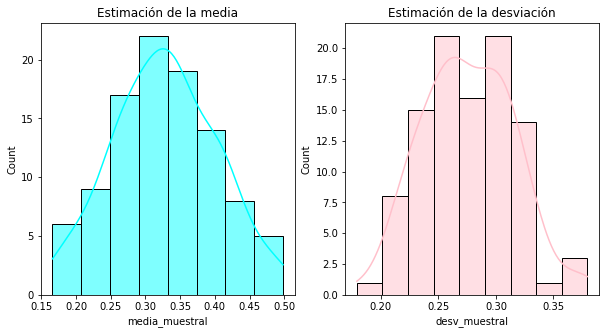

In [35]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Estimación de la media')
ax[1].set_title('Estimación de la desviación')
sns.histplot(estimaciones_15,x='media_muestral',color='cyan',kde=True,ax=ax[0])
sns.histplot(estimaciones_15,x='desv_muestral',color='pink',kde=True,ax=ax[1])
plt.show()

Cómo afecta el tamaño de la muestra a la estimación que estamos haciendo? Vamos a construir un diagrama de dispersión para esto, que nos muestre en el eje horizontal el tamaño de la muestra y en el eje vertical el parámetro que estamos midiendo. Por cada tamaño de muestra vamos a tomar 5 muestras. 

In [37]:
muestras = pd.DataFrame(columns=['media_muestral','desv_muestral','tam_muestra'])
for k in range(10,400):
  estimaciones = muestras_parametros(5,k,0)
  estimaciones['tam_muestra'] = k
  muestras = muestras.append(estimaciones)
#observamos el dataframe
muestras.sample(10)

,media_muestral,desv_muestral,tam_muestra
2,0.323924,0.270406,21
1,0.331213,0.275112,398
4,0.316017,0.276784,266
0,0.340993,0.292292,176
0,0.312875,0.286971,349
0,0.322983,0.268464,260
3,0.367030,0.262660,75
2,0.342409,0.278787,295
4,0.344582,0.267567,354
4,0.422613,0.253314,33


Ahora, veamos los scatterplots resultantes. 

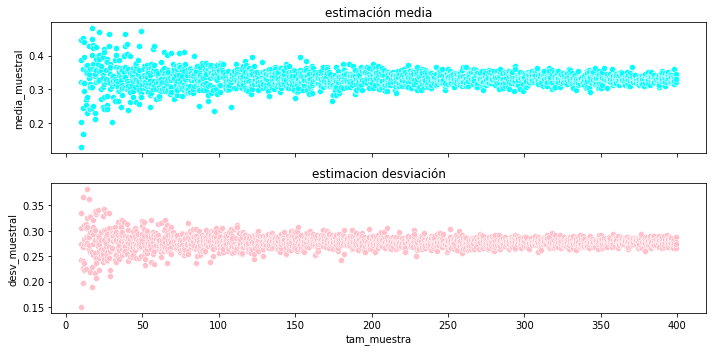

In [42]:
fig,ax=plt.subplots(2,1,figsize=(10,5),sharex=True)
ax[0].set_title('estimación media')
ax[1].set_title('estimacion desviación')
sns.scatterplot(data=muestras,x='tam_muestra',y='media_muestral',
                color='cyan',ax=ax[0])
sns.scatterplot(data=muestras,x='tam_muestra',y='desv_muestral',
                color='pink',ax=ax[1])
plt.tight_layout()
plt.show()

Notemos que hay una relación entre el tamaño de muestra y las estimaciones de la media y la desviación que obtuvimos. Esto es el teorema del límite central. 

Notemos que esta estimación se estabiliza después de un cierto tamaño de muestra. En nuestro caso podemos ver que este número es alrededor de 250. Así, se sugiere que con muestras de tamaño 250 (o más) podemos calcular nuestro estimador de la media y la desviación. 

# Un primer clasificador basado en la curva de Bell (normal estándar).

Una primera forma de determinar si un valor $X$ arbitrario pertenece a una clase es a través de una *prueba de normalidad* que involucra una media y una desviación fijas ($\mu$ y $\sigma$) respectivamente, por medio de un indicador llamado el *z-score* que se calcula de la siguiente forma:

>> $$z(X) = \frac{X-\mu}{\sigma}$$

así, sobre el valor que tome un $X$ particular con respecto a una elección particular de $\mu$ y de $\sigma$ podemos decir si $X$ pertenece o no a una clase si fijamos un *umbral* para el *z-score* en el sentido de que:

>> $$ |z(X)| < \epsilon$$ 

entonces implica que $X$ si pertenece a esa clase. Vamos a implementar esto en un método sencillo que retorne **True** si pertenece a la clase **False** de lo contrario. 

In [47]:
def prueba_Z(X,mu,sigma,umbral):
  z_score = (X-mu)/sigma
  if abs(z_score) < umbral:
    return True
  else:
    return False

Ahora, con nuestro dataset, podemos usar esta prueba Z con los valores de la media y desviación de la población (ojo que pueden ser reales o falsos) para comenzar a clasificar a nuestras observaciones de modo arbitrario. 

Generemos un método que tome una muestra del dataset y haga una *predicción* sobre este. Para esto, vamos a usar una *función lambda* en Python. Un método que toma una fila del dataset y con base en los valores de sus columnas, nos retorne si es de clase 0 o clase 1 dado un umbral y los valores de la media y la desviación. 

In [58]:
def predictor_Z_clase0(fila_dataset,media, desv, umbral):
  prediccion = prueba_Z(fila_dataset['X'],media,desv,umbral)
  if prediccion == True:
    return 0
  else:
    return 1

#notemos la utilización de la función lambda. 
def predecir(muestra,media,desv,umbral):
  muestra['clase_prediccion'] = muestra.apply(lambda fila: predictor_Z_clase0(fila,
                                                                              media,
                                                                              desv,
                                                                              umbral),axis=1)
  return muestra

 Desde la primera parte sabemos que la clase 0 está normalmente distribuida con una media $\mu_0 = 0.1$ y una desviación $\sigma_0=0.18$. Veamos cómo nos va con una muestra de tamaño 10 y un umbral $\epsilon=1.0$ arbitrariamente escogido. 

In [59]:
muestra = poblacion.sample(10)
prediccion = predecir(muestra,0.1,0.18,1.0)
prediccion

,X,clase,clase_prediccion
706,0.421495,1.0,1
1563,0.595719,1.0,1
1685,0.683265,1.0,1
841,0.990810,1.0,1
1621,0.027063,0.0,0
1416,0.105638,0.0,0
1272,0.727065,1.0,1
1634,0.002115,0.0,0
602,0.393839,0.0,1
1696,0.657598,1.0,1


Notemos que aquí estamos dependiendo de un montón de parámetros *a priori* que deberíamos conocer: un umbral $\epsilon$ y los valores de la media $\mu$ y la desviación $\sigma$. Aquí, vale la pena crear un *objeto* Python que actúe como una *caja negra* a la cual le administramos los datos y él genere todo: los parámetros para clasificar, escoja un umbral y nosotros solamente podamos predecir una clase. Dejaremos ese ejercicio para otra ocasión pues nos interesa primero analizar el error y ver cómo se relaciona con los tamaños de muestra. 

Antes de ir para allá, notemos cómo se distribuye sobre nuestro dataset este estadístico $Z-score$ agregando a todo nuestro dataset el valor del z-score con los valores teóricos de la media y la desviación para la clase $0$, $\mu_0=0.1$ y $\sigma_0=0.18$. 

In [98]:
poblacion['z-score'] = (poblacion['X']-0.1)/0.18
poblacion['z-score absoluto'] = abs(poblacion['z-score'])
poblacion.head(5)

,X,clase,z-score,z-score absoluto
0,-0.208224,0.0,-1.712355,1.712355
1,0.896816,1.0,4.426758,4.426758
2,0.739086,1.0,3.550478,3.550478
3,-0.204766,0.0,-1.693145,1.693145
4,0.125009,0.0,0.138938,0.138938


Ahora, veamos cómo queda la *distribución* del estadístico z para ambas clases:

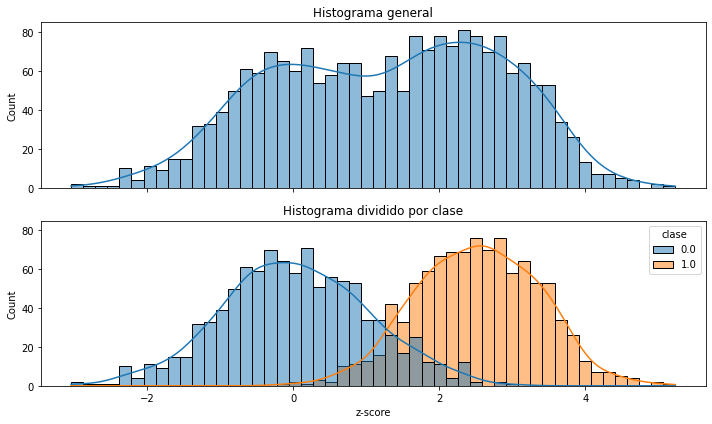

In [100]:
fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True,sharey=True) #para cuadrarle el tamaño a la gráfica
ax[0].set_title('Histograma general')
ax[1].set_title('Histograma dividido por clase')
sns.histplot(poblacion,x='z-score',bins=50,kde=True,ax=ax[0])
sns.histplot(poblacion,x='z-score',hue='clase',bins=50,kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

Como la prueba que estamos haciendo depende del valor absoluto del z-score, veamos cómo se ve el z-score absoluto. 

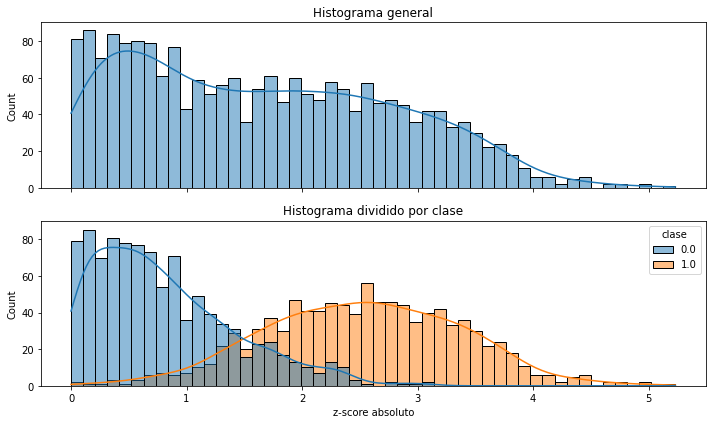

In [101]:
fig,ax = plt.subplots(2,1,figsize=(10,6),sharex=True,sharey=True) #para cuadrarle el tamaño a la gráfica
ax[0].set_title('Histograma general')
ax[1].set_title('Histograma dividido por clase')
sns.histplot(poblacion,x='z-score absoluto',bins=50,kde=True,ax=ax[0])
sns.histplot(poblacion,x='z-score absoluto',hue='clase',bins=50,kde=True,ax=ax[1])
plt.tight_layout()
plt.show()

# Evaluando nuestro clasificador 

Notemos que el predictor le pegó a algunos casos, en otros se equivocó. Aquí, estas equivocaciones del clasificador es importante dividirlas. De aquí es de donde sale la **confusión** del clasificador que es uno de los indicadores que debemos tener en cuenta para determinar si un clasificador es apropiado o no. 

Vamos a distinguir cuatro posibilidades:
* **Verdaderos Positivos (TP)**: los que son de clase 0 y que el clasificador reconoce como clase 0.

* **Verdaderos Negativos (TN)**: los que son de clase 1 y que el clasificador reconoce como clase 1. 

* **Falsos Positivos (FP)**: los que son de clase 1 pero que el clasificador afirma que son de clase 0. 

* **Falsos Negativos (FN)**: los que son de clase 0, pero que el clasificador afirma que son de clase 1. 

In [52]:
def calcular_confusion(muest):
  #verdaderos con respecto a la clasificación
  TP = len(muestra.loc[(muest['clase']==0) & (muest['clase_prediccion']==0)])
  TN = len(muestra.loc[(muest['clase']==1) & (muest['clase_prediccion']==1)])
  #equivocaciones del clasificador
  FP = len(muestra.loc[(muest['clase']==1) & (muest['clase_prediccion']==0)])
  FN = len(muestra.loc[(muest['clase']==0) & (muest['clase_prediccion']==1)])
  return TP,TN,FP,FN

Veamos cómo le fue a nuestra muestra de tamaño 10 con el umbral 1.0. 

In [54]:
tp,tn,fp,fn = calcular_confusion(pred_muestra)
print("Verdaderos Positivos",tp)
print("Verdaderos Negativos",tn)
print("Falsos positivos",fp)
print("Falsos negativos",fn)

Verdaderos Positivos 7
Verdaderos Negativos 2
Falsos positivos 0
Falsos negativos 1


Ahora, aquí comenzamos a definir algunos indicadores a partir de estos indicadores. Los fundamentales son:

> **Exactitud (Accuracy)**: qué tan bien le fue al clasificador en general, clasificando tanto positivos como negativos:
$$ACC = \frac{TP+TN}{TP+FP+TN+FN}$$

> **Sensibilidad (Hit rate, TP-rate)**: qué tan bien clasifica el clasificador. Esta es la proporción de verdaderos positivos entre todos los positivos del problema:

$$TPR = \frac{TP}{TP+FN}$$

> **Precisión (Positive Predictive Value)**: qué tan bueno es identificando cuando clasifica. Esta es la proporción de verdaderos positivos entre todos los positivos que encontró. 

$$PPV = \frac{TP}{TP+FP}$$

para esta muestra que tomamos, veamos cómo quedan estas métricas de desempeño. Podemos pensar que son porcentajes también. 

In [56]:
def metricas_confusion(muestra_pred):
  tp,tn,fp,fn = calcular_confusion(muestra_pred)
  acc = (tp+tn)/(tp+tn+fp+fn)
  sensi = tp/(tp+fn)
  prec = tp/(tp+fp)
  return acc,sensi,prec

exactitud,sensibilidad,precision = metricas_confusion(pred_muestra)
print('Exactitud',exactitud)
print('sensibilidad',sensibilidad)
print('precisión',precision)

Exactitud 0.9
sensibilidad 0.875
precisión 1.0


Notemos que esto lo hicimos para apenas una sola muestra. Podemos automatizar esto, por medio de una función que le damos tanto el tamaño de muestra, como el umbral (y sus valores de la media y la desviación) y que nos muestre sus indicadores de confusión: 

In [60]:
def indicadores_confusion_automaticos(tam_muestra,media,desv,umbral):
  muest = poblacion.sample(tam_muestra)
  predicc = predecir(muest,media,desv,umbral)
  return metricas_confusion(predicc)

Notemos que tenemos cuatro parámetros libres: el tamaño de la muestra $k$, la media del clasificador $\mu$, la desviación del clasificador $\sigma$ y el umbral $\epsilon$. 

Por el momento quedémonos con los valores teóricos $\mu=0.1$ y $\sigma=0.18$. Qué pasa entonces tanto con el tamaño de la muestra $k$, como con el umbral $\epsilon$? Veamos primero qué pasa con las métricas de confusión cuando aumentamos el tamaño de la muestra clasificada: Para esto, vamos a tomar muestras de tamaño $k$ entre 10 y 100 para ver cómo se comporta nuestra clasificación con un umbral fijo $\epsilon =1.0$.   

In [75]:
indicadores_tam_muestra = pd.DataFrame(columns=['tam_muestra','accuracy','sensibilidad','precision'])
for tam in range(10,100):
  acc,sensi,prec = indicadores_confusion_automaticos(tam,0.1,0.18,1.0)
  indicadores_tam_muestra = indicadores_tam_muestra.append({'tam_muestra':tam,
                                                            'accuracy':acc,
                                                            'sensibilidad':sensi,
                                                            'precision':prec},
                                                           ignore_index=True)




Ahora, vamos a graficar estas como curvas, para ver cómo el tamaño de la muestra (eje horizontal) define estas métricas: 

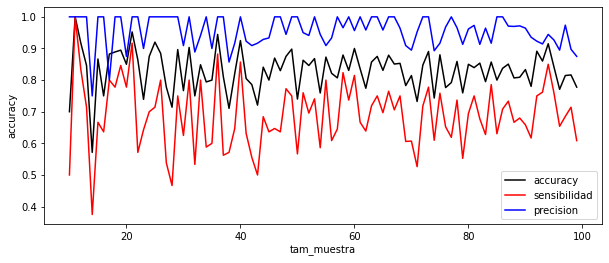

In [76]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=indicadores_tam_muestra,x='tam_muestra',color='black',
             y='accuracy',label='accuracy')
sns.lineplot(data=indicadores_tam_muestra,x='tam_muestra',color='red',
             y='sensibilidad',label='sensibilidad')
sns.lineplot(data=indicadores_tam_muestra,x='tam_muestra',color='blue',
             y='precision',label='precision')
plt.show()

Notemos que aquí, el tamaño de muestra pareciera que no es un indicador para saber qué tan bueno es un clasificador con respecto al tamaño de muestra. Veamos ahora esta misma información usando un **pair plot** que grafica todas las métricas contra todas.  

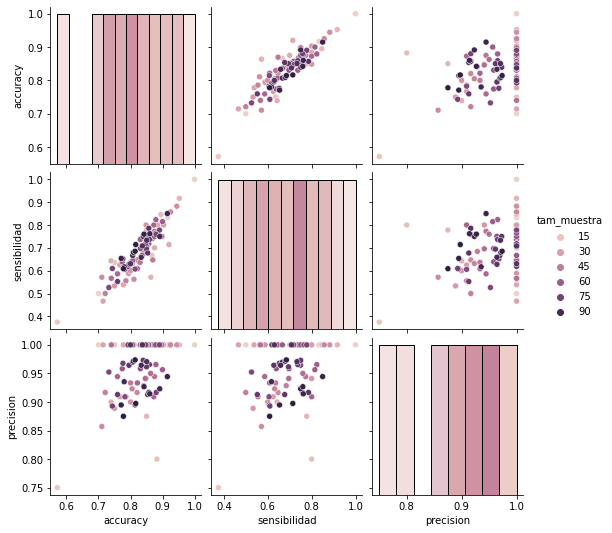

In [77]:
sns.pairplot(indicadores_tam_muestra,
             hue='tam_muestra',
             diag_kind='hist')
plt.show()

Notemos que las dispersiones son muy poco informativas. Excepto en el caso de la exactitud (Accuracy) vs sensibilidad que parecen estar relacionadas linealmente. Probabilísticamente hablando, notemos que las métricas de confusión aquí son *uniformes* y además están regadas sin importar el tamaño de la muestra que tomemos (noten el desorden de colores). Es decir, la probabilidad de tener mejores métricas es igual **sin importar** el tamaño de muestra que tomemos. 

# Análisis de precisión y sensibilidad (ROC y AUC)

Cuando analizamos el parámetro del umbral que hemos escogido $\epsilon$ para determinar si una observación (fila en el DataFrame) pertenece o no a la clase $0$, comenzamos a analizar el comportamiento del clasificador de una forma distinta. 

Notemos que es este umbral el que en últimas define la clasificación en virtud de la prueba Z antes desarrollada. Mientras que el tamaño de muestra sobre el cual evaluamos es *accidental* para evaluar (hasta cierto punto).

Aquí es donde comenzamos a hacer un análisis que se llama ROC (Receiver-Operator Curve) que surgió del análisis de radares en la guerra fría donde oficiales observaban los patrones de vuelo de aviones tenían que decidir si un avión era amigo (*friendly*) o no. Así, la decisión de cada radio-operador era única y dependía de su experticia. 

En el caso de nuestro clasificador, recordemos que la decisión de si un número arbitrario $X$ es de clase $0$ depende de la prueba: 

$$ |z(X;\mu,\sigma)| < \epsilon $$ 

este valor $\epsilon$ es parte de la **experticia** del clasificador en determinar y juega EL papel fundamental en la creador de un buen clasificador. 

In [88]:
umbrales = np.linspace(0.1,3,500,endpoint=True)
indicadores_umbral = pd.DataFrame(columns=['umbral','accuracy','sensibilidad','precision'])
for umbral in umbrales:
  acc,sensi,prec = indicadores_confusion_automaticos(300,0.1,0.18,umbral)
  indicadores_umbral = indicadores_umbral.append({'umbral':umbral,
                                                            'accuracy':acc,
                                                            'sensibilidad':sensi,
                                                            'precision':prec},
                                                           ignore_index=True)



Si repetimos las gráficas anteriores para ver cómo se distribuyen los indicadores que tenemos dependiendo del umbral escogido, podemos ver cómo el umbral escogido nos determina las métricas de confusión de este clasificador: 

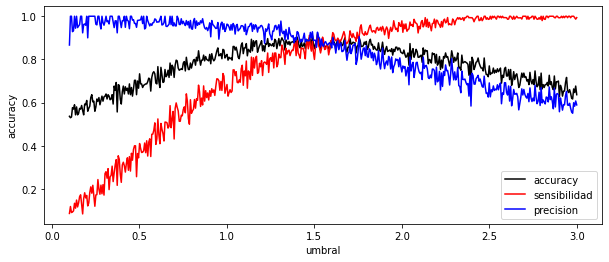

In [89]:
fig,ax = plt.subplots(figsize=(10,4))
sns.lineplot(data=indicadores_umbral,x='umbral',color='black',
             y='accuracy',label='accuracy')
sns.lineplot(data=indicadores_umbral,x='umbral',color='red',
             y='sensibilidad',label='sensibilidad')
sns.lineplot(data=indicadores_umbral,x='umbral',color='blue',
             y='precision',label='precision')
plt.show()

Notemos que en este caso, si hay una diferencia. Los valores de exactitud, sensibilidad y precisión convergen en un umbral cercano a 1.5. Más aún, la noten que la exactitud del clasificador tiene una suerte de máximo alrededor de 1.5 y decrece cuando nos vamos hacia 3, mientras que la sensibilidad del clasificador aumenta en la medida en que nos acercamos hacia 3 (clasifica más como positivos) y la precisión con que lo hace decrece a medida en que aumentamos el umbral. Veamos esto ahora en versión **pairplot**: 

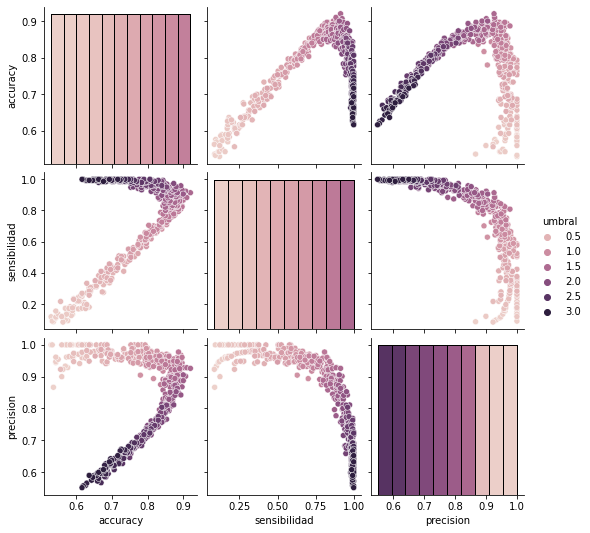

In [90]:
sns.pairplot(indicadores_umbral,hue='umbral',diag_kind='hist')
plt.show()

Notemos que aquí si hay un patrón definido por el color (el valor del umbral $\epsilon$). En particular, nos interesa la curva de precisión vs sensibilidad: 

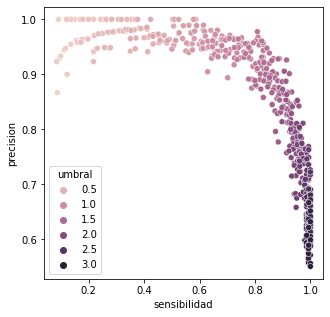

In [91]:
fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(data=indicadores_umbral,x='sensibilidad',
                y='precision',hue='umbral')
plt.show()

Notemos que cuando el umbral es muy bajo, la sensibilidad del clasificador es muy baja (tiende a decir SI muy poco), pero cuando dice SI es porque de veras es un verdadero positivo (con una precisión perfecta). En este sentido podemos decir que el clasificador es *estricto* a la hora de seleccionar. 

A medida que el umbral se abre, el clasificador se *relaja* en el sentido en el que acepta más observaciones como de clase $0$ (su sensibilidad aumenta), pero su precisión al clasificar baja, dando lugar a muchos *falsos positivos*. 

Luego, hay un **trade-off** natural entre sensibilidad y precisión que siempre debemos tener en cuenta. 



Otro elemento que debemos tener en cuenta mucho es la cantidad de verdaderos positivos y la cantidad de falsos negativos dependiendo del umbral. Aquí es donde hablamos de una **curva ROC** que nos permite ver cómo los falsos positivos comienzan a aparecer y se entremezclan con los verdaderos positivos. 

Primero, notemos que el dataset original tiene positivos y negativos (para la clase $0$). Así, el número de positivos dentro de una muestra, tiene que corresponder con los verdaderos positivos que el clasificador encuentra $TP$ y con los *falsos negativos* que el clasificador mal-clasifica pero que están ahí. Así, definimos $P$ como la cantidad de positivos y 

$$P = TP+FN$$

En este sentido, la sensibilidad del clasificador o la cantidad de verdaderos positivos que pilla el clasificador:

$$TPR = \frac{TP}{P}=\frac{TP}{TP+FN}$$

Paralelo a esto, podemos definir el *desastre* del clasificador como la cantidad de falsos positivos que el clasificador produce, en contraste con los verdaderos *negativos* de la muestra $N$. 

Notemos que los negativos de la muestra se pueden calcular a partir de los verdaderos negativos que encuentra el clasificador y la cantidad de falsos positivos que el clasificador da:

$$N = TN+FP$$

así, el *desastre* del clasificador o la tasa de falsos positivos sería:
$$FPR = \frac{FP}{N} = \frac{FP}{TN+FP}$$

In [92]:
indicadores_ROC = pd.DataFrame(columns=['umbral','tasa-TP','tasa-FP'])
for umbral in umbrales:
  muestra = poblacion.sample(300)
  prediccion = predecir(muestra,0.1,0.18,umbral)
  tp,tn,fp,fn = calcular_confusion(prediccion)
  tpr = tp/(tp+fn)
  fpr = fp/(fp+tn)
  indicadores_ROC = indicadores_ROC.append({'umbral':umbral,
                                            'tasa-TP':tpr,
                                            'tasa-FP':fpr},
                                           ignore_index=True)


Ahora, si graficamos estos indicadores del desastre del clasificador vs su sensibilidad obtenemos lo que se llama la *curva ROC* de este clasificador (ROC para Curva de Receptor-Operador):



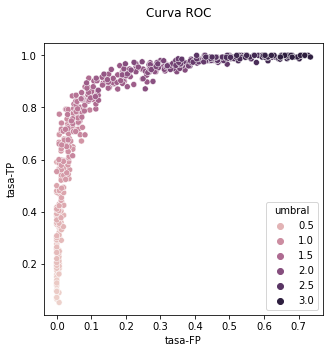

In [94]:
fig,ax=plt.subplots(figsize=(5,5))
fig.suptitle('Curva ROC')
sns.scatterplot(data=indicadores_ROC,x='tasa-FP',
                y='tasa-TP',hue='umbral')
plt.show()

Cuando ponemos ambas gráficas en conjunto la de la curva de precisión y sensibilidad juntas, tenemos un panorama completo acerca del clasificador dependiendo del umbral: 

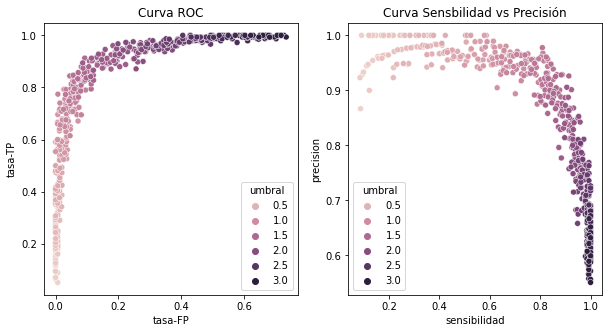

In [97]:
fig,ax=plt.subplots(1,2, figsize=(10,5))
ax[0].set_title('Curva ROC')
ax[1].set_title('Curva Sensbilidad vs Precisión')
sns.scatterplot(data=indicadores_ROC,x='tasa-FP',
                y='tasa-TP',hue='umbral',ax=ax[0])
sns.scatterplot(data=indicadores_umbral,x='sensibilidad',
                y='precision',hue='umbral',ax=ax[1])

plt.show()